# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [ ]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

11490434/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


Create the MLP

In [ ]:
model = Sequential()
model.add(Dense(600, input_shape=(784,), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 600)               471000    
                                                                 
 dense_5 (Dense)             (None, 10)                6010      
                                                                 
Total params: 477,010
Trainable params: 477,010
Non-trainable params: 0
_________________________________________________________________


Define some constants and train the MLP

In [ ]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2735 - accuracy: 0.9219 - val_loss: 0.1468 - val_accuracy: 0.9575
Epoch 2/10
422/422 [==============================] - 1s 4ms/step - loss: 0.1130 - accuracy: 0.9663 - val_loss: 0.0848 - val_accuracy: 0.9755
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0740 - accuracy: 0.9776 - val_loss: 0.0751 - val_accuracy: 0.9778
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0524 - accuracy: 0.9845 - val_loss: 0.0669 - val_accuracy: 0.9800
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0683 - val_accuracy: 0.9803
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0294 - accuracy: 0.9914 - val_loss: 0.0685 - val_accuracy: 0.9812
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0215 - accuracy: 0.9939 - val_loss: 0.0664 - val_accuracy: 0.9808
Epoch 

Show the performance of the model

Test score: 0.060618676245212555
Test accuracy: 0.9815000295639038


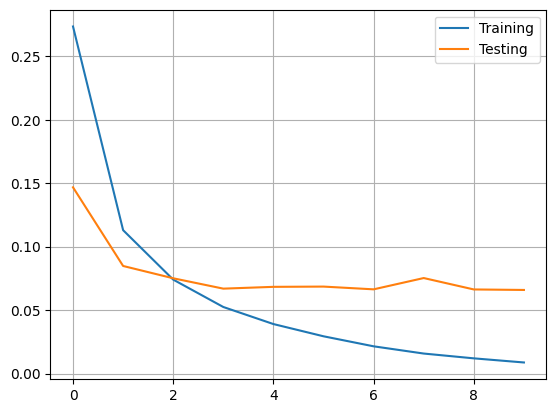

In [ ]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

313/313 [==============================] - 1s 2ms/step


array([[ 970,    1,    2,    0,    1,    0,    3,    1,    2,    0],
       [   0, 1128,    2,    1,    0,    1,    2,    1,    0,    0],
       [   4,    2, 1005,    3,    3,    0,    2,    5,    8,    0],
       [   1,    0,    4,  994,    0,    5,    0,    1,    3,    2],
       [   0,    0,    1,    1,  967,    0,    6,    1,    0,    6],
       [   2,    0,    0,    5,    1,  871,    6,    0,    5,    2],
       [   3,    2,    1,    1,    3,    2,  945,    0,    1,    0],
       [   2,    5,    7,    4,    0,    0,    0, 1002,    4,    4],
       [   1,    2,    3,    4,    3,    2,    1,    2,  955,    1],
       [   3,    3,    0,    5,   10,    2,    1,    4,    3,  978]])